# CLUB algorithm draft - Online Clustering of Bandits

In [103]:
import numpy as np
import numpy.random as npr
import numpy.linalg
import pandas as pd
from scipy.spatial.distance import euclidean
import networkx as nx
import matplotlib.pyplot as plt

### Commentaires

Quelques remarques pour la partie Artificial Datasets page 6:
   
* Vecteurs des vrais clusters $u_{j}$ est crée directement. Pas besoin de M et b
* Matrices C générées sur la sphere unitaire, on aurait alors un nombre infini de profils de users mais pas trop distants les uns des autres (je l'ai déjà intégré dans le code avec la fonction sphere_unif)
* T = 5000 + 50,000 pourquoi cette décomposition ?

Problème de convergence: sur une période suffisamment longue, on supprime tous les noeuds du graphe <br>

# Initialisation

In [48]:
#tests
V=nx.Graph()
V.add_node(1)
V.add_node(2)
V.add_node(3)
V.add_edge(1,2)
V.add_edge(3,2)
print(V.adj)

{1: {2: {}}, 2: {1: {}, 3: {}}, 3: {2: {}}}


In [169]:
V=nx.Graph(np.ones([4,4]))
#V=nx.Graph(np.identity(3))
#print(V.adj)
print(V[1])

{0: {'weight': 1.0}, 1: {'weight': 1.0}, 2: {'weight': 1.0}, 3: {'weight': 1.0}}


In [166]:
V.remove_edge(0,1)
V.remove_edge(2,3)
V.remove_edge(3,1)
V.remove_edge(0,2)

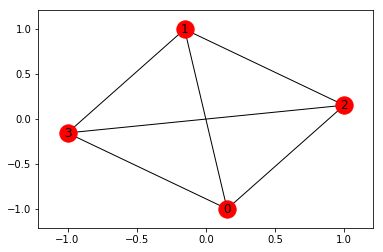

In [170]:
nx.draw_networkx(V)
plt.show()

In [171]:
len(list(nx.connected_component_subgraphs(V)))

1

In [118]:
list(V.nodes)

[0, 1, 2]

In [121]:
V[0][2]

{'weight': 1.0}

In [119]:
[n for n in V[1]]

[1, 2]

In [95]:
0 in V[1]

True

In [117]:
V.remove_edge(0,1)

In [106]:
#sphere unitaire pour générer les matrices de contexte C à chaque période
def sphere_unif(dim,N):
    norm = np.random.normal
    normal_deviates = norm(size=(dim, N))
    radius = np.sqrt((normal_deviates**2).sum(axis=0))
    points = normal_deviates/radius
    return(points)

In [184]:
#itérations
T=10
#nombre d'utilisateurs
n_user=27
#dimension des catégories/labels à prédire
D=3
#matrice M_i associée à l'approximation des paramètres du cluster j(i)
#paramètre b_i associé à l'approximation des paramètres du cluster j(i)
d_M=dict()
d_b=dict()
for i in range(n_user):
    d_M['M%d' % i]=np.identity(D)
    d_b['b%d' % i]=np.zeros(D)

#vrai nombre de clusters (supposé connu et constant pour chaque période) 
m=1
#nombre de clusters estimé. Pas nécessaire dans l'algo ? On part de c=1, un seul cluster à t=0
c=10         
#variation autour de la payoff (white noise)
sigma=1
#nombre de users dans chaque cluster

#initialiser omega
omega=np.ones(D)
#init matrice V du graphe réel
V=nx.Graph( np.ones([n_user,n_user]) )
#paramètre du confidence bound
alpha=1
alpha2=2
#standard deviation du white noise
sigma=1
#liste des indices précédents
list_i=[]
#liste de matrices de contexte C_it pré-définies. Pour user i à période t, on va piocher dans cette liste
#nb_context=int(n_user/3) #nombre de contextes différents
#list_C=[]
#for cont in range(nb_context):
#    list_C.append(npr.uniform(0,1,size=[D,c]))
    #list_C.append(npr.normal(0,1,size=[D,c]))


## Algo CLUB

période t= 0
user i= 1
omega: [ 0.  0.  0.]
nombre de clusters: 1


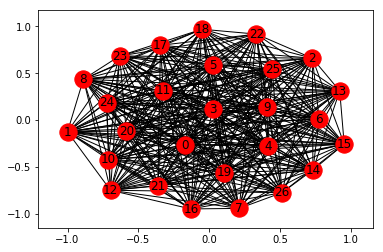

période t= 1
user i= 7
omega: [ 0.  0.  0.]
nombre de clusters: 1


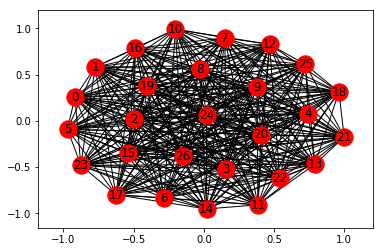

période t= 2
user i= 12
omega: [ 0.  0.  0.]
nombre de clusters: 1


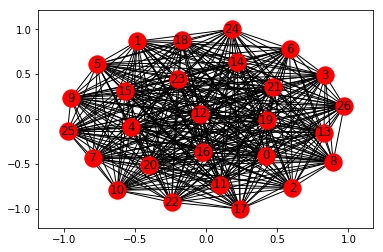

période t= 3
user i= 4
omega: [ 0.  0.  0.]
nombre de clusters: 1


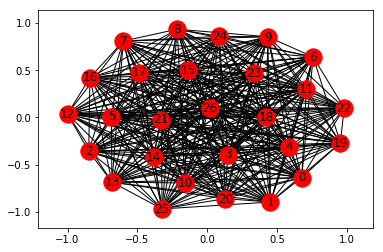

période t= 4
user i= 11
omega: [ 0.  0.  0.]
nombre de clusters: 1


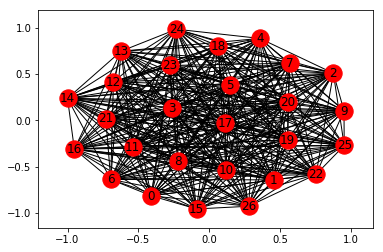

période t= 5
user i= 10
omega: [ 0.  0.  0.]
nombre de clusters: 1


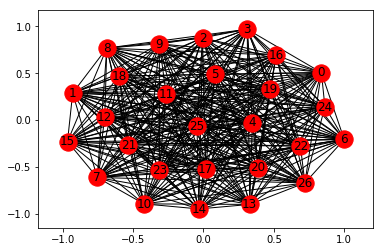

période t= 6
user i= 15
omega: [ 0.  0.  0.]
brise le lien entre users 15 et 16
brise le lien entre users 15 et 17
brise le lien entre users 15 et 18
brise le lien entre users 15 et 19
brise le lien entre users 15 et 20
brise le lien entre users 15 et 21
brise le lien entre users 15 et 22
brise le lien entre users 15 et 23
brise le lien entre users 15 et 24
brise le lien entre users 15 et 25
brise le lien entre users 15 et 26
nombre de clusters: 1


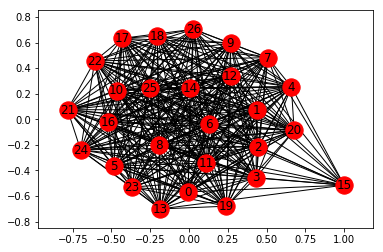

période t= 7
user i= 12
omega: [ 0.17544268 -0.08496035 -0.01408613]
brise le lien entre users 12 et 13
brise le lien entre users 12 et 14
brise le lien entre users 12 et 15
brise le lien entre users 12 et 16
brise le lien entre users 12 et 17
brise le lien entre users 12 et 18
brise le lien entre users 12 et 19
brise le lien entre users 12 et 20
brise le lien entre users 12 et 21
brise le lien entre users 12 et 22
brise le lien entre users 12 et 23
brise le lien entre users 12 et 24
brise le lien entre users 12 et 25
brise le lien entre users 12 et 26
nombre de clusters: 1


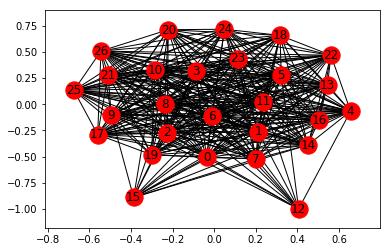

période t= 8
user i= 25
omega: [ 0.  0.  0.]
nombre de clusters: 1


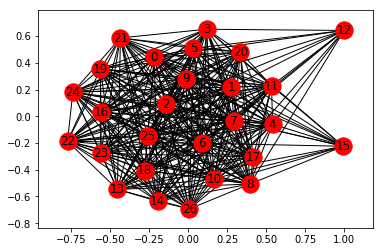

période t= 9
user i= 14
omega: [ 0.  0.  0.]
brise le lien entre users 14 et 15
brise le lien entre users 14 et 16
brise le lien entre users 14 et 17
brise le lien entre users 14 et 18
brise le lien entre users 14 et 19
brise le lien entre users 14 et 20
brise le lien entre users 14 et 21
brise le lien entre users 14 et 22
brise le lien entre users 14 et 23
brise le lien entre users 14 et 24
brise le lien entre users 14 et 25
brise le lien entre users 14 et 26
nombre de clusters: 1


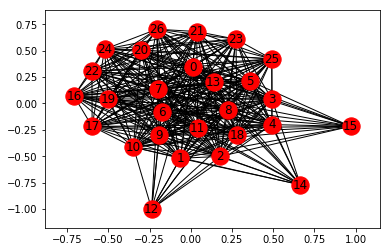

période t= 10
user i= 10
omega: [-1.18337207  1.56324024 -0.41911756]
brise le lien entre users 10 et 11
brise le lien entre users 10 et 12
brise le lien entre users 10 et 13
brise le lien entre users 10 et 14
brise le lien entre users 10 et 15
brise le lien entre users 10 et 16
brise le lien entre users 10 et 17
brise le lien entre users 10 et 18
brise le lien entre users 10 et 19
brise le lien entre users 10 et 20
brise le lien entre users 10 et 21
brise le lien entre users 10 et 22
brise le lien entre users 10 et 23
brise le lien entre users 10 et 24
brise le lien entre users 10 et 25
brise le lien entre users 10 et 26
nombre de clusters: 1


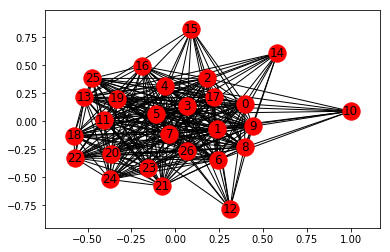

période t= 11
user i= 20
omega: [ 0.  0.  0.]
brise le lien entre users 20 et 21
brise le lien entre users 20 et 22
brise le lien entre users 20 et 23
brise le lien entre users 20 et 24
brise le lien entre users 20 et 26
nombre de clusters: 1


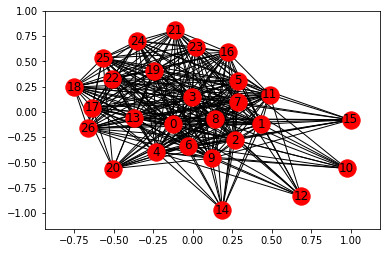

période t= 12
user i= 0
omega: [ 0.  0.  0.]
brise le lien entre users 0 et 1
brise le lien entre users 0 et 2
brise le lien entre users 0 et 3
brise le lien entre users 0 et 4
brise le lien entre users 0 et 5
brise le lien entre users 0 et 6
brise le lien entre users 0 et 7
brise le lien entre users 0 et 8
brise le lien entre users 0 et 9
brise le lien entre users 0 et 10
brise le lien entre users 0 et 11
brise le lien entre users 0 et 12
brise le lien entre users 0 et 13
brise le lien entre users 0 et 14
brise le lien entre users 0 et 15
brise le lien entre users 0 et 16
brise le lien entre users 0 et 17
brise le lien entre users 0 et 18
brise le lien entre users 0 et 19
brise le lien entre users 0 et 20
brise le lien entre users 0 et 21
brise le lien entre users 0 et 22
brise le lien entre users 0 et 23
brise le lien entre users 0 et 24
brise le lien entre users 0 et 25
brise le lien entre users 0 et 26
nombre de clusters: 2


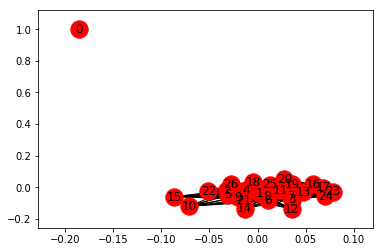

période t= 13
user i= 4
omega: [-0.12624503  0.69891581 -0.64341374]
brise le lien entre users 4 et 5
brise le lien entre users 4 et 6
brise le lien entre users 4 et 7
brise le lien entre users 4 et 8
brise le lien entre users 4 et 9
brise le lien entre users 4 et 10
brise le lien entre users 4 et 11
brise le lien entre users 4 et 12
brise le lien entre users 4 et 13
brise le lien entre users 4 et 14
brise le lien entre users 4 et 15
brise le lien entre users 4 et 16
brise le lien entre users 4 et 17
brise le lien entre users 4 et 18
brise le lien entre users 4 et 19
brise le lien entre users 4 et 20
brise le lien entre users 4 et 21
brise le lien entre users 4 et 22
brise le lien entre users 4 et 23
brise le lien entre users 4 et 24
brise le lien entre users 4 et 25
brise le lien entre users 4 et 26
nombre de clusters: 2


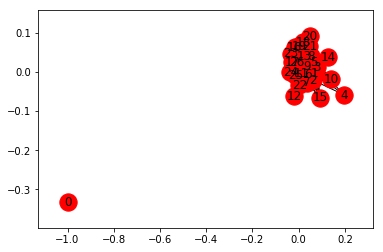

période t= 14
user i= 12
omega: [-4.19700378  7.9806855  -5.02843587]
brise le lien entre users 12 et 1
brise le lien entre users 12 et 2
brise le lien entre users 12 et 3
brise le lien entre users 12 et 5
brise le lien entre users 12 et 6
brise le lien entre users 12 et 7
brise le lien entre users 12 et 8
brise le lien entre users 12 et 9
brise le lien entre users 12 et 11
nombre de clusters: 3


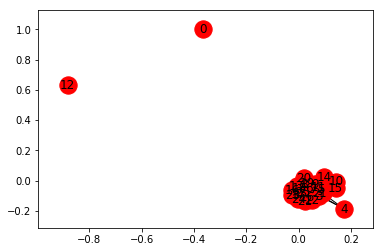

période t= 15
user i= 0
omega: [-29.78146693  22.05298914   7.29649982]
nombre de clusters: 3


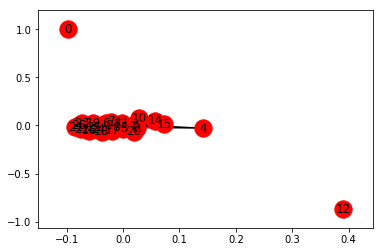

période t= 16
user i= 6
omega: [ 0.  0.  0.]
brise le lien entre users 6 et 7
brise le lien entre users 6 et 8
brise le lien entre users 6 et 9
brise le lien entre users 6 et 10
brise le lien entre users 6 et 11
brise le lien entre users 6 et 13
brise le lien entre users 6 et 14
brise le lien entre users 6 et 15
brise le lien entre users 6 et 16
brise le lien entre users 6 et 17
brise le lien entre users 6 et 18
brise le lien entre users 6 et 19
brise le lien entre users 6 et 20
brise le lien entre users 6 et 21
brise le lien entre users 6 et 22
brise le lien entre users 6 et 23
brise le lien entre users 6 et 24
brise le lien entre users 6 et 25
brise le lien entre users 6 et 26
nombre de clusters: 3


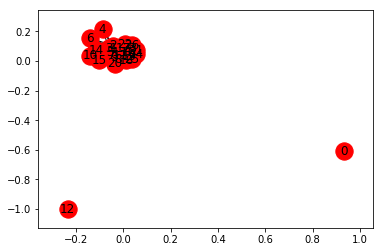

période t= 17
user i= 9
omega: [ 0.  0.  0.]
brise le lien entre users 9 et 10
brise le lien entre users 9 et 11
brise le lien entre users 9 et 13
brise le lien entre users 9 et 14
brise le lien entre users 9 et 15
brise le lien entre users 9 et 16
brise le lien entre users 9 et 17
brise le lien entre users 9 et 18
brise le lien entre users 9 et 19
brise le lien entre users 9 et 20
brise le lien entre users 9 et 21
brise le lien entre users 9 et 22
brise le lien entre users 9 et 23
brise le lien entre users 9 et 24
brise le lien entre users 9 et 25
brise le lien entre users 9 et 26
nombre de clusters: 3


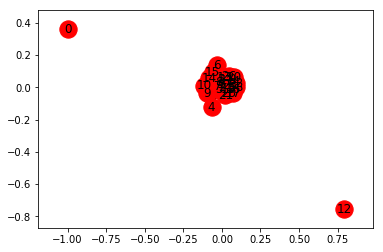

période t= 18
user i= 2
omega: [ 0.  0.  0.]
brise le lien entre users 2 et 3
brise le lien entre users 2 et 4
brise le lien entre users 2 et 5
brise le lien entre users 2 et 6
brise le lien entre users 2 et 7
brise le lien entre users 2 et 8
brise le lien entre users 2 et 9
brise le lien entre users 2 et 10
brise le lien entre users 2 et 11
brise le lien entre users 2 et 13
brise le lien entre users 2 et 14
brise le lien entre users 2 et 15
brise le lien entre users 2 et 16
brise le lien entre users 2 et 17
brise le lien entre users 2 et 18
brise le lien entre users 2 et 19
brise le lien entre users 2 et 20
brise le lien entre users 2 et 21
brise le lien entre users 2 et 22
brise le lien entre users 2 et 23
brise le lien entre users 2 et 24
brise le lien entre users 2 et 25
brise le lien entre users 2 et 26
nombre de clusters: 3


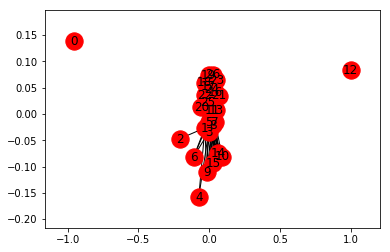

période t= 19
user i= 1
omega: [-0.22851832  0.25355334 -0.08964332]
brise le lien entre users 1 et 2
brise le lien entre users 1 et 3
brise le lien entre users 1 et 4
brise le lien entre users 1 et 5
brise le lien entre users 1 et 6
brise le lien entre users 1 et 7
brise le lien entre users 1 et 8
brise le lien entre users 1 et 9
brise le lien entre users 1 et 10
brise le lien entre users 1 et 11
brise le lien entre users 1 et 13
brise le lien entre users 1 et 14
brise le lien entre users 1 et 15
brise le lien entre users 1 et 16
brise le lien entre users 1 et 17
brise le lien entre users 1 et 18
brise le lien entre users 1 et 19
brise le lien entre users 1 et 20
brise le lien entre users 1 et 21
brise le lien entre users 1 et 22
brise le lien entre users 1 et 23
brise le lien entre users 1 et 24
brise le lien entre users 1 et 25
brise le lien entre users 1 et 26
nombre de clusters: 5


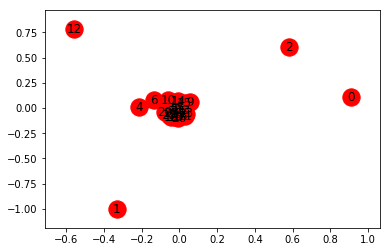

période t= 20
user i= 13
omega: [ 0.  0.  0.]
brise le lien entre users 13 et 14
brise le lien entre users 13 et 15
brise le lien entre users 13 et 16
brise le lien entre users 13 et 17
brise le lien entre users 13 et 18
brise le lien entre users 13 et 19
brise le lien entre users 13 et 20
brise le lien entre users 13 et 21
brise le lien entre users 13 et 22
brise le lien entre users 13 et 23
brise le lien entre users 13 et 24
brise le lien entre users 13 et 25
brise le lien entre users 13 et 26
nombre de clusters: 5


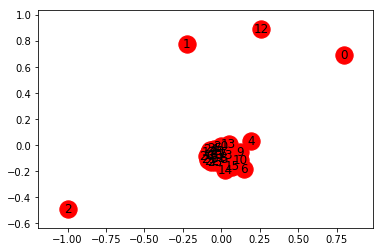

période t= 21
user i= 8
omega: [ 0.  0.  0.]
brise le lien entre users 8 et 9
brise le lien entre users 8 et 10
brise le lien entre users 8 et 11
brise le lien entre users 8 et 13
brise le lien entre users 8 et 14
brise le lien entre users 8 et 15
brise le lien entre users 8 et 16
brise le lien entre users 8 et 17
brise le lien entre users 8 et 18
brise le lien entre users 8 et 19
brise le lien entre users 8 et 20
brise le lien entre users 8 et 21
brise le lien entre users 8 et 22
brise le lien entre users 8 et 23
brise le lien entre users 8 et 24
brise le lien entre users 8 et 25
brise le lien entre users 8 et 26
nombre de clusters: 5


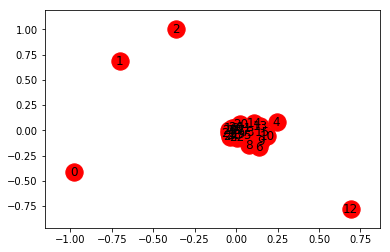

période t= 22
user i= 1
omega: [-164.18619948  137.58427331    8.45282747]
nombre de clusters: 5


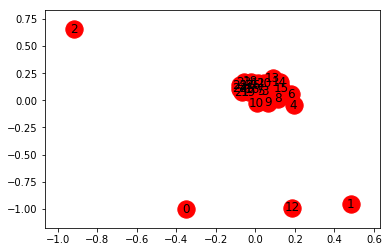

période t= 23
user i= 9
omega: [-12.96659584  35.48845967 -33.75293164]
brise le lien entre users 9 et 3
brise le lien entre users 9 et 5
brise le lien entre users 9 et 7
nombre de clusters: 6


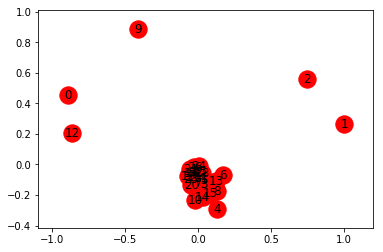

période t= 24
user i= 4
omega: [ -8.16328207  42.13646591 -41.43156083]
brise le lien entre users 4 et 3
nombre de clusters: 7


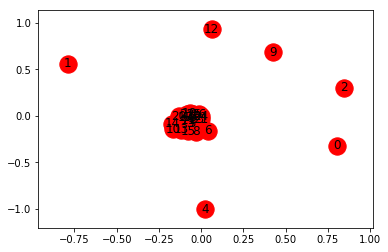

période t= 25
user i= 12
omega: [ -8.73718707  17.60405533 -10.06176336]
nombre de clusters: 7


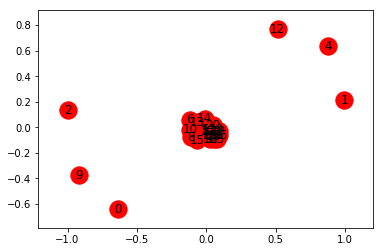

période t= 26
user i= 26
omega: [ 0.  0.  0.]
brise le lien entre users 26 et 25
nombre de clusters: 7


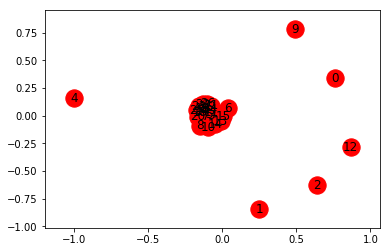

période t= 27
user i= 24
omega: [ 0.  0.  0.]
brise le lien entre users 24 et 25
brise le lien entre users 24 et 26
nombre de clusters: 7


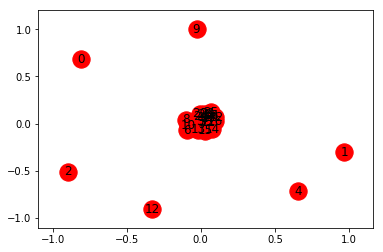

période t= 28
user i= 7
omega: [-0.13023694  0.15214129 -0.01811864]
brise le lien entre users 7 et 8
brise le lien entre users 7 et 10
brise le lien entre users 7 et 11
brise le lien entre users 7 et 13
brise le lien entre users 7 et 14
brise le lien entre users 7 et 15
brise le lien entre users 7 et 16
brise le lien entre users 7 et 17
brise le lien entre users 7 et 18
brise le lien entre users 7 et 19
brise le lien entre users 7 et 20
brise le lien entre users 7 et 21
brise le lien entre users 7 et 22
brise le lien entre users 7 et 23
brise le lien entre users 7 et 24
brise le lien entre users 7 et 25
brise le lien entre users 7 et 26
nombre de clusters: 7


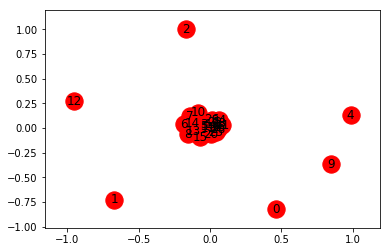

période t= 29
user i= 7
omega: [-89.34007531  89.03890254 -20.45325799]
brise le lien entre users 7 et 3
brise le lien entre users 7 et 5
nombre de clusters: 8


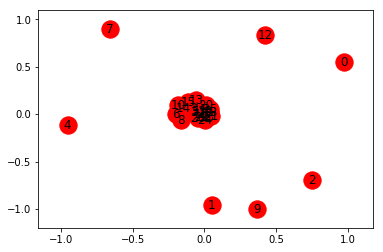

période t= 30
user i= 18
omega: [ 0.  0.  0.]
brise le lien entre users 18 et 19
brise le lien entre users 18 et 20
brise le lien entre users 18 et 21
brise le lien entre users 18 et 22
brise le lien entre users 18 et 23
brise le lien entre users 18 et 24
brise le lien entre users 18 et 25
brise le lien entre users 18 et 26
nombre de clusters: 8


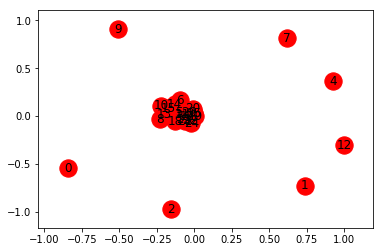

période t= 31
user i= 14
omega: [-1.28046814  6.40883952 -8.08243426]
brise le lien entre users 14 et 3
brise le lien entre users 14 et 5
brise le lien entre users 14 et 11
nombre de clusters: 9


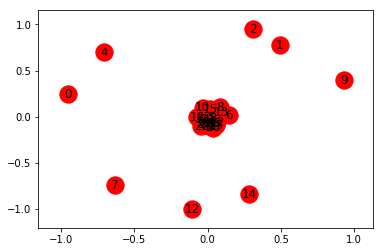

période t= 32
user i= 23
omega: [ 0.  0.  0.]
brise le lien entre users 23 et 24
brise le lien entre users 23 et 25
brise le lien entre users 23 et 26
nombre de clusters: 9


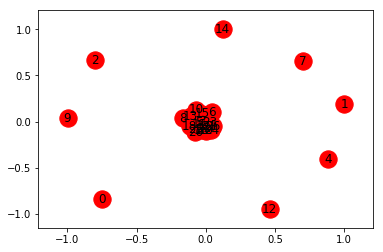

période t= 33
user i= 5
omega: [ 0.  0.  0.]
brise le lien entre users 5 et 6
brise le lien entre users 5 et 8
brise le lien entre users 5 et 10
brise le lien entre users 5 et 11
brise le lien entre users 5 et 13
brise le lien entre users 5 et 15
brise le lien entre users 5 et 16
brise le lien entre users 5 et 17
brise le lien entre users 5 et 18
brise le lien entre users 5 et 19
brise le lien entre users 5 et 20
brise le lien entre users 5 et 21
brise le lien entre users 5 et 22
brise le lien entre users 5 et 23
brise le lien entre users 5 et 24
brise le lien entre users 5 et 25
brise le lien entre users 5 et 26
nombre de clusters: 9


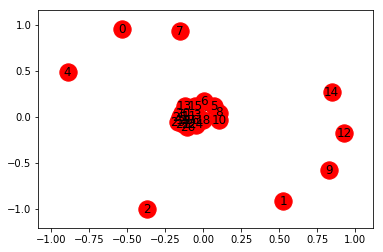

période t= 34
user i= 9
omega: [ -7.09849298  65.57122241 -67.70787803]
nombre de clusters: 9


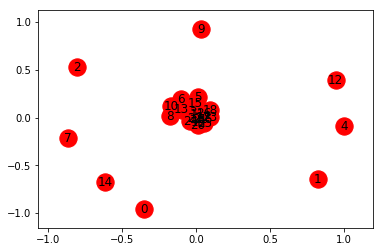

période t= 35
user i= 1
omega: [-298.80566703  292.80167656   -1.83272531]
nombre de clusters: 9


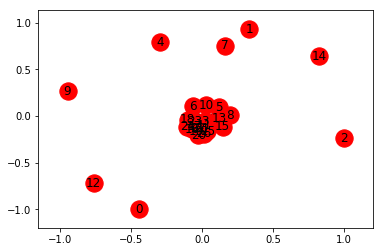

période t= 36
user i= 10
omega: [ -8.90748658  28.13752191 -19.50900267]
brise le lien entre users 10 et 3
nombre de clusters: 10


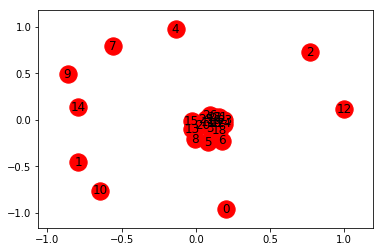

période t= 37
user i= 10
omega: [-19.58542907  37.40162671 -20.27488174]
nombre de clusters: 10


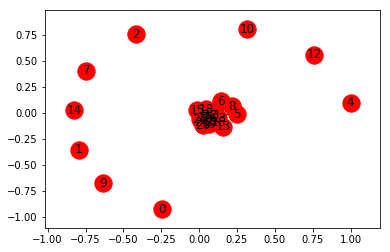

période t= 38
user i= 9
omega: [ -38.09220275  121.52656167  -85.4733143 ]
nombre de clusters: 10


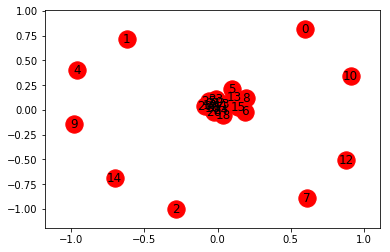

période t= 39
user i= 23
omega: [ -6.13160422  11.92297486  -5.15724927]
brise le lien entre users 23 et 3
brise le lien entre users 23 et 11
brise le lien entre users 23 et 16
brise le lien entre users 23 et 17
brise le lien entre users 23 et 19
brise le lien entre users 23 et 21
brise le lien entre users 23 et 22
nombre de clusters: 11


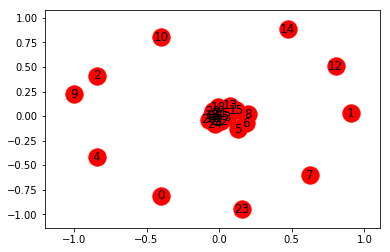

période t= 40
user i= 20
omega: [-0.18148198  4.61928446 -4.0031945 ]
brise le lien entre users 20 et 3
brise le lien entre users 20 et 11
brise le lien entre users 20 et 16
brise le lien entre users 20 et 17
brise le lien entre users 20 et 19
brise le lien entre users 20 et 25
nombre de clusters: 12


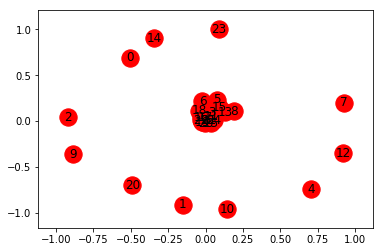

période t= 41
user i= 20
omega: [  0.93909471  12.22005756 -13.3809029 ]
nombre de clusters: 12


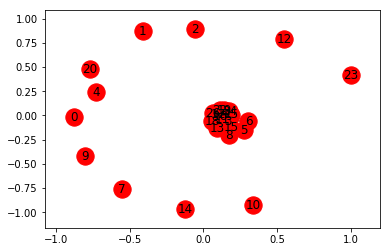

période t= 42
user i= 14
omega: [  2.38423421  10.25083841 -15.22538198]
nombre de clusters: 12


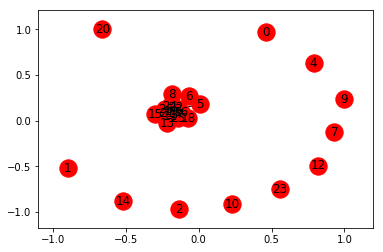

période t= 43
user i= 23
omega: [ -6.63424563  18.73059735 -13.0139795 ]
nombre de clusters: 12


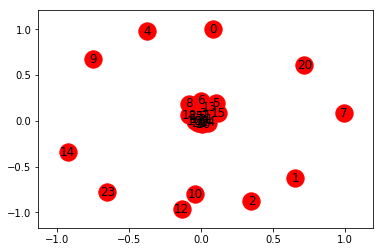

période t= 44
user i= 8
omega: [ -32.2453713   109.53532123  -73.70786008]
brise le lien entre users 8 et 3
nombre de clusters: 13


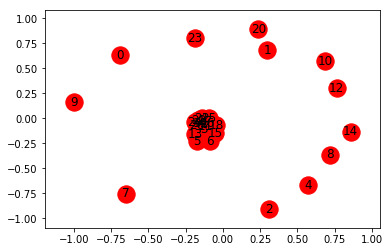

période t= 45
user i= 17
omega: [ 0.  0.  0.]
brise le lien entre users 17 et 18
brise le lien entre users 17 et 19
brise le lien entre users 17 et 21
brise le lien entre users 17 et 22
brise le lien entre users 17 et 24
brise le lien entre users 17 et 25
brise le lien entre users 17 et 26
nombre de clusters: 13


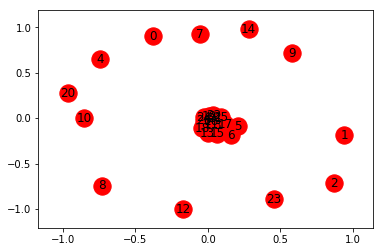

période t= 46
user i= 19
omega: [ 0.  0.  0.]
brise le lien entre users 19 et 21
brise le lien entre users 19 et 22
brise le lien entre users 19 et 24
brise le lien entre users 19 et 25
brise le lien entre users 19 et 26
nombre de clusters: 13


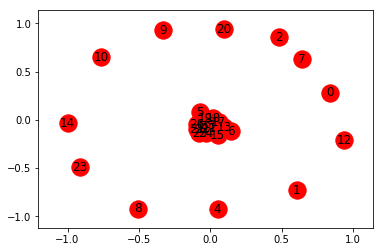

période t= 47
user i= 2
omega: [ -60.808529    143.7319949  -100.52039511]
nombre de clusters: 13


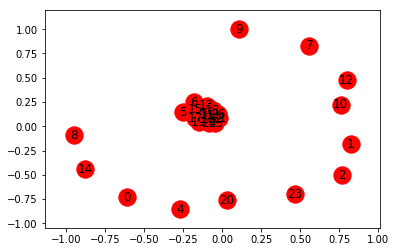

période t= 48
user i= 8
omega: [ -71.0244037   214.62429626 -145.50818838]
nombre de clusters: 13


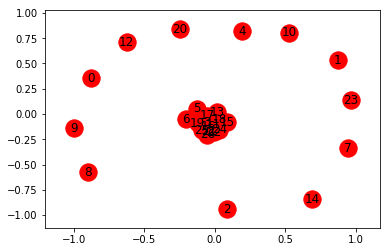

période t= 49
user i= 11
omega: [ 0.15827042  1.50011361 -1.5121701 ]
brise le lien entre users 11 et 13
brise le lien entre users 11 et 15
brise le lien entre users 11 et 16
brise le lien entre users 11 et 17
brise le lien entre users 11 et 18
brise le lien entre users 11 et 19
brise le lien entre users 11 et 21
brise le lien entre users 11 et 22
brise le lien entre users 11 et 24
brise le lien entre users 11 et 25
brise le lien entre users 11 et 26
nombre de clusters: 13


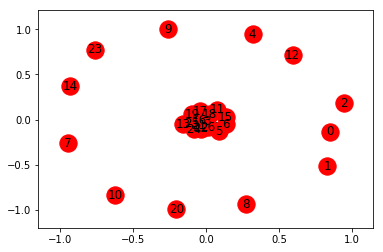

In [185]:
T=50
for t in range(T):
    print("période t=",t)
    #choisir aléatoirement un user i
    i=int(npr.uniform(0,n_user))
    print("user i=",i)
    list_i.append(i)
    #reçoit contexte C_it généré aléatoirement sur une sphere unitaire
    C = sphere_unif(D,c)
    #piocher dans un ensemble de profils générés aléatoirement à t=0
    #indique les préférences de user i à période t pour chaque cluster estimé 1...c
    #C = list_C[ int( npr.uniform(0,nb_context) ) ]  
    #genère omega
    omega=np.zeros([n_user,D])
    print("omega:",np.dot(np.linalg.inv(d_M['M'+str(int(i))]),d_b['b'+str(int(i))]))
    omega[i,:]=np.dot(np.linalg.inv(d_M['M'+str(int(i))]),d_b['b'+str(int(i))])
    #détermine l'indice du cluster de i: j_t(i)
    #calcule M_bar et b_bar et omega aggrégés
    #on récupère tous les indices qui appartiennent au même cluster que celui de i
    M_index = [ n for n in V[i] ]  #liste d'indices des noeuds au point i
    M_sum=sum([d_M['M'+str(int(k))] for k in M_index])
    M_bar=np.identity(D)+M_sum-len(M_index)*np.identity(D)
    b_bar=sum([d_b['b'+str(int(k))] for k in M_index])
    omega_bar=np.dot(np.linalg.inv(M_bar),b_bar)
    #détermine k_t optimal pour cluster j_t(i)
    vect_k=np.zeros(c)
    for k in range(c):
        CB=alpha*np.sqrt(np.dot(np.dot(C[:,k].T,np.linalg.inv(M_bar)),C[:,k])*np.log(t+1))
        vect_k[k]=CB+np.dot(omega_bar.T,C[:,k])
    k_t=[v for v in range(c) if vect_k[v]==np.max(vect_k)][0]
    #calcule payoffs
    a_t=np.dot(omega_bar,C[:,k_t])+npr.normal(loc=0,scale=sigma,size=1)
    #update weights
    d_M['M'+str(int(i))]=d_M['M'+str(int(i))]+np.dot(C[:,k_t],C[:,k_t].T)
    d_b['b'+str(int(i))]=d_b['b'+str(int(i))]+a_t*C[:,k_t]
    #update clusters
    T_i=list_i.count(i)-1  #nombre de user i piochés sur les périodes précédentes (exlcue période t actuelle)
    if list_i.count(i)==1: #cas spécifique pour lorsque i est pioché pour la 1ère fois
        T_i=1
    CB_tild=np.zeros(n_user) #calcul des bornes de confiance pour tous les user
    CB_tild[i]=alpha2*np.sqrt((1+np.log(1+T_i))/(1+T_i)) #CB pour i, on en a besoin dans la boucle sur les autres users
    for l in range(n_user): #CB pour les autres users
        T_i=list_i.count(l)-1
        if list_i.count(l)==1:
            T_i=1
        if list_i.count(l)==0:
            T_i=0
        CB_tild[l]=alpha2*np.sqrt((1+np.log(1+T_i))/(1+T_i))
        omega[l,:]=np.dot(np.linalg.inv(d_M['M'+str(int(l))]),d_b['b'+str(int(l))])
        norm_diff_omega=euclidean(omega[l,:],omega[i,:])
        if (norm_diff_omega > CB_tild[l] + CB_tild[i]) & (l in V[i]): #si la distance entre users i et l on brise le lien
            V.remove_edge(i,l)
            print("brise le lien entre users",i,"et",l)
        #update le nombre de sous-graphes i.e. nombre de clusters at la période t
        m=len( list( nx.connected_component_subgraphs(V) ) )
    print("nombre de clusters:",m)
    nx.draw_networkx(V)
    plt.show()
    
